In [101]:
#IMPORTACIÓN DE LIBRERÍAS
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

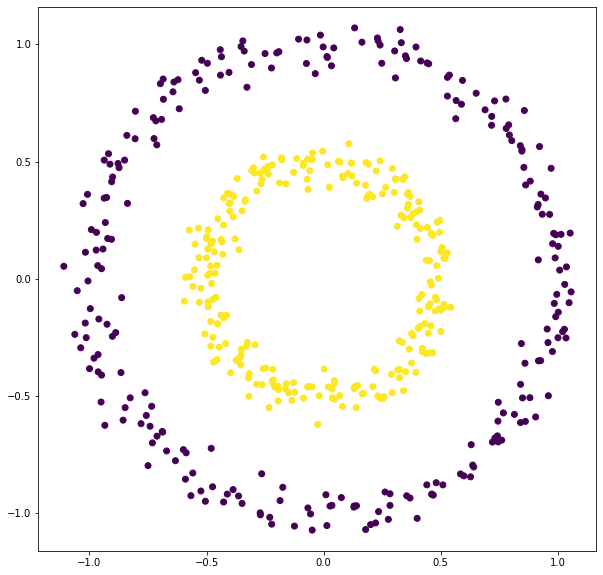

In [102]:
#CREAR EL DATASETS
n = 500 #número de registros
p = 2 #número de características en esos datos

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
Y = Y[:, np.newaxis]

plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c = Y)
plt.axis('equal')
plt.show()

In [103]:
# CLASE DE LA CAPA DE LA RED

class neural_layer():
  
  def __init__(self, n_conn, n_neur, act_f):
    
    #n_conn es el número de conexiones de entrada
    #n_neur es el número de neuronas
    #act_f es la función de activación
    
    self.act_f = act_f
    
    #self.b = np. random.rand(1, n_neur)      * 2 - 1 #Esto último es para normalizarlo con media 0
    self.b = np.random.randn(n_neur)
    #self.b = np. random.rand(n_conn, n_neur) * 2 - 1 #Esto último es para normalizarlo con media 0
    self.W = np.random.randn(n_conn, n_neur)

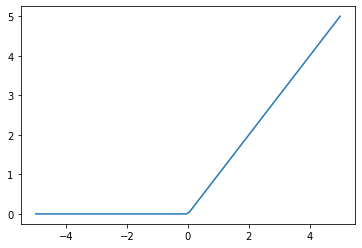

In [104]:
# FUNCIONES DE ACTIVACIÓN

# variable en abcisas para testing de cada función
_x = np.linspace(-5,5, 100)

# se definen cada función y su derivada como pares de funciones
sigm = (lambda x: 1 / (1 + np.e ** (-x)), lambda x: x * (1 - x)) 
relu = (lambda x: np.maximum(0,x),)
        

# testeo de cada función
plt.plot(_x, relu[0](_x))

In [105]:
# podríamos crear las capas una a una de la siguiente forma, pero creando una función será mucho mejor
layer_0 = neural_layer(p, 4, sigm)
layer_1 = neural_layer(4, 8, sigm)
# ...

In [106]:
def create_nn(topology, act_f): # El vector topology será un vector que contenga el número de neuronas de cada capa

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(layer, topology[l+1], act_f))

  return nn

In [107]:
topology = [p, 4, 8, 1] # número de capas de la red neuronal. La última será 1 porque queremos como resultado un resultado binario (o es de un grupo o del otro)

neural_net = create_nn(topology, sigm)

In [108]:
# definimos la función de coste como el error cuadrático medio

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr = 0.5, train = True):

  # neural_net es la red neuronal
  # X son los valores de entrada
  # Y son los valores previstos de la clasificación
  # l2_cost sería la función de coste, que en nuestro caso usamos el error cuadrático medio
  # lr es el ratio de aprendizaje (learning rate), que es el grado de actualización de parámetros tras cada backpropagation
  # train entrena con backpropagation la red si está en True

  out = [(None, X)]

  # FORWARD PASS
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z,a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    # BACKWARD PASS
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W

      # GRADIENT DESCENT
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims = True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0]* lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)

0.45024078560934344


array([[0.06031558],
       [0.0585162 ],
       [0.06120953],
       [0.05765778],
       [0.05974094],
       [0.05593814],
       [0.0615409 ],
       [0.05770077],
       [0.04834126],
       [0.0560873 ],
       [0.05861465],
       [0.0557604 ],
       [0.05839923],
       [0.05445409],
       [0.03882617],
       [0.0547556 ],
       [0.04946196],
       [0.05229481],
       [0.05652309],
       [0.05765814],
       [0.05940606],
       [0.05217574],
       [0.04871746],
       [0.04387378],
       [0.0569273 ],
       [0.05332698],
       [0.05835761],
       [0.04786573],
       [0.04211389],
       [0.0362599 ],
       [0.0581797 ],
       [0.05085225],
       [0.06131797],
       [0.05426363],
       [0.05140054],
       [0.03555694],
       [0.05789835],
       [0.05673987],
       [0.0493299 ],
       [0.05962498],
       [0.05688057],
       [0.0399865 ],
       [0.05594789],
       [0.04557971],
       [0.05287432],
       [0.0507492 ],
       [0.0476969 ],
       [0.045

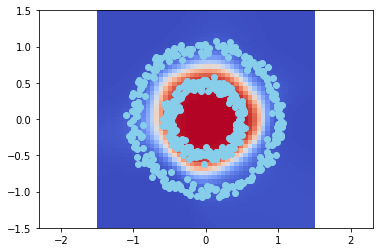

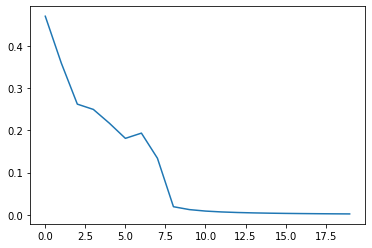

0.0022752082825343765
0.002267141547332101
0.0022591284823804125
0.0022511685704598586
0.002243261300857346
0.002235406169264815
0.002227602677679817
0.0022198503343079257
0.0022121486534669534
0.002204497155492958
0.002196895366647953
0.002189342819029334
0.002181839050480943
0.0021743836045057707
0.0021669760301802374
0.00215961588207003
0.0021523027201474586
0.0021450361097103037
0.002137815621302118
0.002130640830633968
0.002123511318507544
0.0021164266707396724
0.0021093864780881485
0.0021023903361788764


In [112]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(500):

  #Entrenamos la red!
  pY = train(neural_n, X, Y, l2_cost, lr = 0.05)

  if i % 25 == 0:

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res) 
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train = False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap = 'coolwarm')
    plt.axis('equal')

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c = 'skyblue')
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c = 'skyblue')

    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)